# Image filtering - Bilateral smoothing

## Packages ##

Let's first import all the packages that you will need.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python. here we want to just display our image array.
- PIL is package for working with image, in this project we use it to read and get the output image

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### Here we get the image and convert it into the 2D array

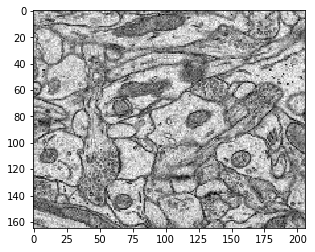

In [2]:
img = Image.open('test-img.pgm')
input_img = np.array(img,dtype=np.float32)
plt.imshow(input_img,plt.cm.gray)
plt.show()

### We want to filter an image with Bilateral filtering:
$$h(x,c) = e^{- (\frac{(x-c)^2}{2sigma_s^2})+\frac{(f(x)-f(c))^2}{2sigma_r^2})} $$
 
where $sigma_s$ and $sigma_r$ are parameter and $f$ s the image intensity

In [17]:
filter_size = 5
sigma_s = 2
# I use a large value for sigma_r to see the smoothing better
sigma_r = 200

In [18]:
def distance(x, y, i, j):
    dist = np.sqrt((x-i)**2 + (y-j)**2)
    return dist

In [19]:
def gaussian(x, sigma):
    x1 = 2*np.pi*(sigma**2)
    x2 = np.exp(-(x**2)/(2* sigma**2))
    gauss = (1.0/x1)*x2
    return gauss

#### we use bilateral filter in neighborhood processing so here when we want to apply filter for each pixel we consider the pixels in the mask

In [22]:
def bilateral_filter(inpt, filtered_image, x, y, mask_size, sigma_r, sigma_s):
    m = mask_size//2
    filtered_pixel = 0
    w_sum = 0
    for i in range(mask_size):
        for j in range(mask_size):
            neighbour_x = x - (m - i)
            neighbour_y = y - (m - j)
            if neighbour_x >= len(inpt):
                neighbour_x -= len(inpt)
            if neighbour_y >= len(inpt[0]):
                neighbour_y -= len(inpt[0])
            gi = gaussian(inpt[neighbour_x][neighbour_y] - inpt[x][y], sigma_r)
            gs = gaussian(distance(neighbour_x, neighbour_y, x, y), sigma_s)
            w = gi * gs
            filtered_pixel += inpt[neighbour_x][neighbour_y] * w
            w_sum += w
    #normalize
    filtered_pixel = filtered_pixel / w_sum
    filtered_image[x][y] = int(round(filtered_pixel))

In [23]:
filtered_image = np.zeros(input_img.shape)

#filling filtered_image
for i in range(input_img.shape[0]):
    for j in range(input_img.shape[1]):
        bilateral_filter(input_img, filtered_image, i, j, filter_size, sigma_r, sigma_s)

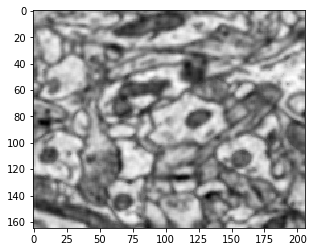

In [24]:
plt.imshow(filtered_image,plt.cm.gray)